# Simple Example of R in Jupyter

## Import a package

In [1]:
library(dplyr)
library(ggplot2)
library(DT)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Install a missing package
### Option 1. Install just for this notebook, each time it is run.

In [2]:
install.packages(c("gtrendsR", "usmap"))
# or do each separately
# install.packages("gtrendsR")
# install.packages("usmap")
library(gtrendsR)
library(usmap)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Option 2. Add the dependency to your docker build so it is always available across all notebooks.
Update the 'requirements.txt' file to include the package name

# Fetch some data

In [3]:
# google searches for "corona" in the US, in the last day
corona <- gtrends("corona",geo = "US", time = "now 1-d")

# grab state and county identifiers
states <- corona$interest_by_region
states$fips <- fips(states$location)

# Do a Plot

Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”
Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”
Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”


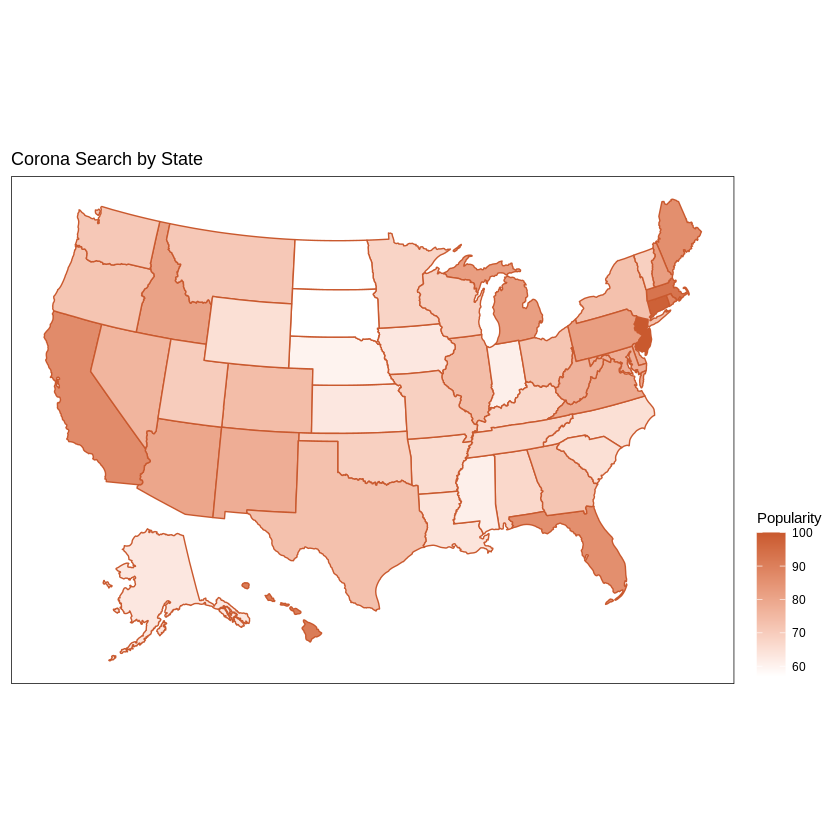

In [4]:
plot_usmap(data = states, values = "hits",  color = "#C9592E", labels=FALSE) + 
  scale_fill_continuous( low = "white", high = "#C9592E", 
                         name = "Popularity", label = scales::comma
  ) + 
  theme(legend.position = "right") + 
  theme(panel.background = element_rect(color = "black")) + 
  labs(title = "Corona Search by State")

# Fetch more Data

In [5]:
fightSongs <- read.csv(url("https://raw.githubusercontent.com/fivethirtyeight/data/master/fight-songs/fight-songs.csv"))

## Non-Interactive table

In [6]:
fightSongs

school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,⋯,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908,No,Yes,No,152,64,⋯,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947,Yes,Yes,No,76,99,⋯,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K. Cook",1930,Yes,Yes,No,155,55,⋯,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912,Yes,Yes,No,137,62,⋯,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927,Yes,Yes,No,80,67,⋯,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm
Oklahoma,Big 12,Boomer Sooner,Arthur M. Alden,1905,Yes,Yes,No,153,37,⋯,No,No,Yes,No,No,No,No,Yes,2,0QXC8Gg1oKWkORegslTXoT
Oklahoma State,Big 12,Ride 'Em Cowboys,J.K. Long,1934,No,Yes,No,180,29,⋯,No,Yes,No,No,No,Yes,Yes,No,4,0mTJqaacUZPG740Y1YDn5j
Texas,Big 12,Texas Fight,"Walter S. Hunnicutt, James E. King and Burnett Pharr",1923,No,Yes,No,81,65,⋯,Yes,Yes,No,No,Yes,No,Yes,No,4,53CytfvDMSkJHY5PtrcZiD
TCU,Big 12,TCU Fight Song,Claude Sammis,1928,No,Yes,No,149,47,⋯,No,Yes,Yes,No,Yes,Yes,No,Yes,6,0ItcRLvqHlbkaqMCPtQKUl


## Interactive Table

In [7]:

datatable(fightSongs, options = list(pageLength = 15))

HTML widgets cannot be represented in plain text (need html)

# FootNote
Followed a great tutorial [here](https://www.littlemissdata.com/blog/usmap) in producing this example